Consider the following parameterization of a policy: There is a \preference" for each
action, for each column and for each row. Thus the set of preferences can be denoted by
θx(N; 0); θy(N; 0); θx(S; 0); θy(S; 0); θx(E; 0); θy(E; 0); :::; θx(W; 9); θy(W; 9), for a total of
80 preference values. The total preference for an action a in a state (i, j) is given by
θx(a; i) + θy(a; j). The action probabilities are generated by a soft-max function using
these preferences.
4. Implement a MC policy gradient algorithm. Choose appropriate learning rates, and turn
in two curves for each variant as indicated in the first part as well as the optimal policies
learnt.

In [3]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [4]:
def softmax_action(state, parameters):
    '''
    Returns action and the probability of that action
    '''
    x, y = state
    north = parameters[x,0,0] + parameters[y,1,0]
    east = parameters[x,0,1] + parameters[y,1,1]
    west = parameters[x,0,2] + parameters[y,1,2]
    south = parameters[x,0,3] + parameters[y,1,3]
    
    # The preferences of each action
    preferences = [north, east, west, south]    
    prefs = np.exp(preferences)
    # The probability of selecting each action
    softmax = (prefs)/np.sum(prefs)
    
    action = np.random.choice([0,1,2,3], 1, p=softmax)
#     print(action)
    action = action[0]
    
    return action, softmax[action]

In [5]:
def selected_param_pos(state, action):
    '''
    Returns the row, column, the direction assigned to the parameter
    '''
    direction = action
    row,col = state
    return row, col, direction

In [6]:
def Update(parameters, states, actions, rewards, params_pos, probs, gamma, alpha):
    '''
    Updates the the parameters
    '''
    
    # Initialize return
    G = 0
    
    i=0
    for prob, pos, reward in zip(probs[::-1], params_pos[::-1], rewards[::-1]):
        
        # The positions of parameters that was used to select the action in ith time step
        row, col, direction = pos
        
        # The parameters that were used in action selection
        theta1 = parameters[row, 0, direction]
        theta2 = parameters[col, 1, direction]
                
        # The return 
        G = reward + pow(gamma,i)*G
        
        # The update equations
        theta1 = theta1 + alpha*pow(gamma,i)*(1 - prob)
        theta2 = theta2 + alpha*pow(gamma,i)*(1 - prob)
        
        parameters[row, 0, direction] = theta1
        parameters[col, 1, direction] = theta2
        
        i+=1
        
        return parameters


In [7]:
def plot_MCPG(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('Monte carlo policy gradient avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('Monte carlo policy gradient num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()

In [12]:

def MC_PG(alpha, gamma, episodes, env, goal):
    '''
    Performs monte carlo policy gradient
    '''
    
    # For each row,direction and For each column,direction one parameter
    parameters = np.random.rand(12,2,4)
    
    # Set goal postion
    goal_pos = env.set_goal(goal)

    # The num steps and avg_reward that we get from each episode is stored
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):
        # An episode
        
        # Store all the states, actions, rewards till the end of episode 
        states = []
        actions = []
        rewards = []
        
        # The parameters that are at each time step
        params_pos = []
        # The probability of picking those parameters
        probs = []
        
        # Reset environment
        curr_state = env.reset()
        
        
        while True:
            # For each step of an episode
            
            # select an action according to softmax probabilities
            curr_action, prob = softmax_action(curr_state, parameters)
#             print(action)

#             print("curr_action = ", curr_action,"curr_state = ",curr_state )

            # Get reward and next state
            next_state, reward = env.step(curr_state, curr_action)
            
            probs.append(prob)
            params_pos.append(selected_param_pos(curr_state, curr_action))
            
            states.append(curr_state)
            actions.append(curr_action)
            rewards.append(reward)

            # Increase the number of steps
            steps[episode] +=1
            
            # Average reward till now
            avg_reward[episode] += reward

            curr_state = next_state
#             curr_action = next_action
#             print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                
                print("Steps =======================", steps[episode])
                print("reward=======================", avg_reward[episode])
                break
        
        # Update the parameters used in action selection in the episode
        parameters = Update(parameters, states, actions, rewards, params_pos, probs, gamma, alpha)
            
    
    return avg_reward, steps, parameters
    

Steps ======================= 131.0
reward======================= 7.0
Steps ======================= 265.0
reward======================= -12.0
Steps ======================= 49.0
reward======================= 6.0
Steps ======================= 67.0
reward======================= -9.0
Steps ======================= 59.0
reward======================= 2.0
Steps ======================= 91.0
reward======================= -48.0
Steps ======================= 35.0
reward======================= 2.0
Steps ======================= 43.0
reward======================= 8.0
Steps ======================= 31.0
reward======================= 0.0
Steps ======================= 48.0
reward======================= 0.0
Steps ======================= 29.0
reward======================= -15.0
Steps ======================= 44.0
reward======================= -12.0
Steps ======================= 65.0
reward======================= 4.0
Steps ======================= 47.0
reward======================= 4.0
Steps =================

Steps ======================= 55.0
reward======================= -3.0
Steps ======================= 35.0
reward======================= -12.0
Steps ======================= 42.0
reward======================= -21.0
Steps ======================= 43.0
reward======================= -7.0
Steps ======================= 40.0
reward======================= 9.0
Steps ======================= 40.0
reward======================= 10.0
Steps ======================= 50.0
reward======================= 3.0
Steps ======================= 53.0
reward======================= -28.0
Steps ======================= 70.0
reward======================= 10.0
Steps ======================= 27.0
reward======================= -12.0
Steps ======================= 61.0
reward======================= -4.0
Steps ======================= 31.0
reward======================= -14.0
Steps ======================= 75.0
reward======================= -3.0
Steps ======================= 24.0
reward======================= 3.0
Steps ============

Steps ======================= 42.0
reward======================= 8.0
Steps ======================= 37.0
reward======================= -2.0
Steps ======================= 47.0
reward======================= 10.0
Steps ======================= 59.0
reward======================= 10.0
Steps ======================= 30.0
reward======================= 2.0
Steps ======================= 35.0
reward======================= 8.0
Steps ======================= 43.0
reward======================= -8.0
Steps ======================= 37.0
reward======================= -8.0
Steps ======================= 33.0
reward======================= 6.0
Steps ======================= 43.0
reward======================= 8.0
Steps ======================= 56.0
reward======================= -13.0
Steps ======================= 28.0
reward======================= -13.0
Steps ======================= 31.0
reward======================= -27.0
Steps ======================= 46.0
reward======================= 7.0
Steps =================

Steps ======================= 76.0
reward======================= -2.0
Steps ======================= 32.0
reward======================= -1.0
Steps ======================= 55.0
reward======================= 9.0
Steps ======================= 49.0
reward======================= -7.0
Steps ======================= 18.0
reward======================= -4.0
Steps ======================= 41.0
reward======================= 4.0
Steps ======================= 43.0
reward======================= -17.0
Steps ======================= 42.0
reward======================= -8.0
Steps ======================= 61.0
reward======================= -21.0
Steps ======================= 16.0
reward======================= 3.0
Steps ======================= 38.0
reward======================= -1.0
Steps ======================= 42.0
reward======================= -8.0
Steps ======================= 47.0
reward======================= 3.0
Steps ======================= 71.0
reward======================= -2.0
Steps ================

Steps ======================= 39.0
reward======================= -23.0
Steps ======================= 34.0
reward======================= -4.0
Steps ======================= 39.0
reward======================= 10.0
Steps ======================= 45.0
reward======================= 3.0
Steps ======================= 48.0
reward======================= 0.0
Steps ======================= 39.0
reward======================= 2.0
Steps ======================= 45.0
reward======================= 7.0
Steps ======================= 31.0
reward======================= 3.0
Steps ======================= 29.0
reward======================= -14.0
Steps ======================= 52.0
reward======================= -1.0
Steps ======================= 81.0
reward======================= -25.0
Steps ======================= 55.0
reward======================= -3.0
Steps ======================= 17.0
reward======================= 6.0
Steps ======================= 41.0
reward======================= 0.0
Steps ==================

Steps ======================= 42.0
reward======================= -14.0
Steps ======================= 43.0
reward======================= -22.0
Steps ======================= 38.0
reward======================= -18.0
Steps ======================= 40.0
reward======================= 2.0
Steps ======================= 58.0
reward======================= 1.0
Steps ======================= 57.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= -1.0
Steps ======================= 22.0
reward======================= 2.0
Steps ======================= 23.0
reward======================= 0.0
Steps ======================= 58.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= -7.0
Steps ======================= 32.0
reward======================= 4.0
Steps ======================= 46.0
reward======================= -11.0
Steps ======================= 40.0
reward======================= -7.0
Steps ================

Steps ======================= 29.0
reward======================= 8.0
Steps ======================= 27.0
reward======================= -9.0
Steps ======================= 41.0
reward======================= -16.0
Steps ======================= 47.0
reward======================= 5.0
Steps ======================= 49.0
reward======================= -2.0
Steps ======================= 34.0
reward======================= 6.0
Steps ======================= 43.0
reward======================= 10.0
Steps ======================= 49.0
reward======================= 2.0
Steps ======================= 41.0
reward======================= 8.0
Steps ======================= 42.0
reward======================= -9.0
Steps ======================= 27.0
reward======================= -5.0
Steps ======================= 45.0
reward======================= 5.0
Steps ======================= 34.0
reward======================= -35.0
Steps ======================= 31.0
reward======================= 0.0
Steps ===================

Steps ======================= 37.0
reward======================= 8.0
Steps ======================= 33.0
reward======================= 3.0
Steps ======================= 46.0
reward======================= 7.0
Steps ======================= 60.0
reward======================= 10.0
Steps ======================= 47.0
reward======================= 7.0
Steps ======================= 43.0
reward======================= 6.0
Steps ======================= 46.0
reward======================= 10.0
Steps ======================= 66.0
reward======================= 4.0
Steps ======================= 23.0
reward======================= -1.0
Steps ======================= 35.0
reward======================= -9.0
Steps ======================= 43.0
reward======================= -7.0
Steps ======================= 48.0
reward======================= 5.0
Steps ======================= 52.0
reward======================= 9.0
Steps ======================= 27.0
reward======================= 1.0
Steps =======================

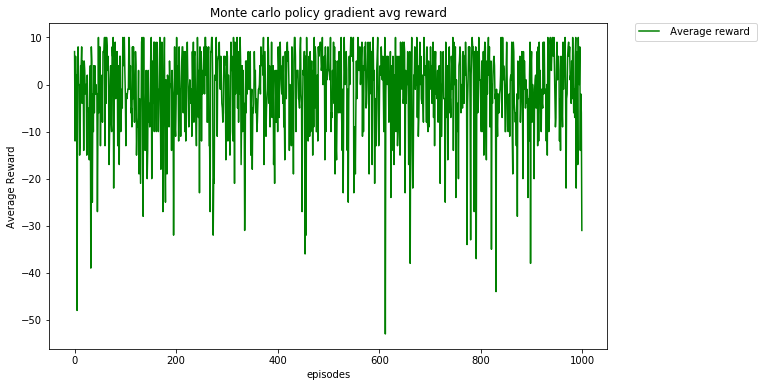

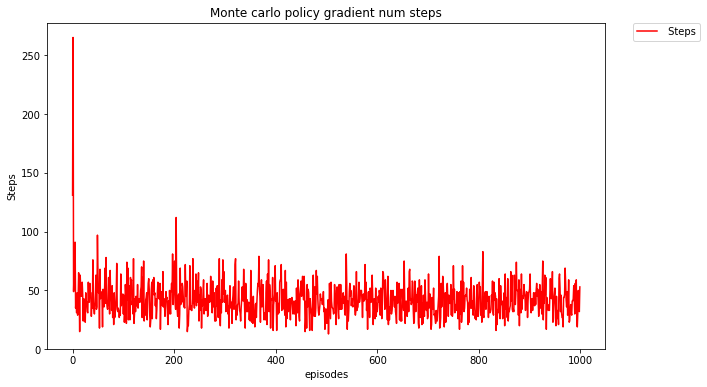

In [13]:
if __name__=='__main__':

    env = gym.make('gym_pdw:pdw-v0')
    
    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
    
    avg_reward, steps, parameters = MC_PG(gamma,alpha, episodes, env, 'A')
    plot_MCPG(avg_reward, steps, episodes)
    

In [ ]:
# To display the policy learn't
# plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()

ax.matshow(np.argmax(parameters, axis=2))
for i in range(12):
    for j in range(12):
        c = int(np.argmax(parameters[i,j,:]))
        direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
        ax.text(i, j, direcs[c], va='center', ha='center')

In [ ]:
z = np.zeros([12,2,4])
np.argmax(z, axis=2)

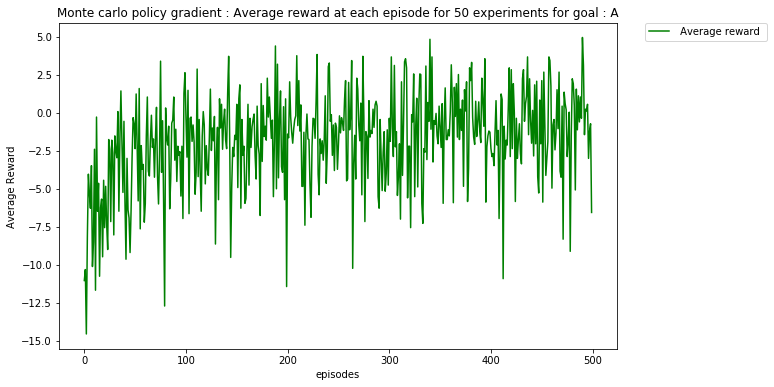

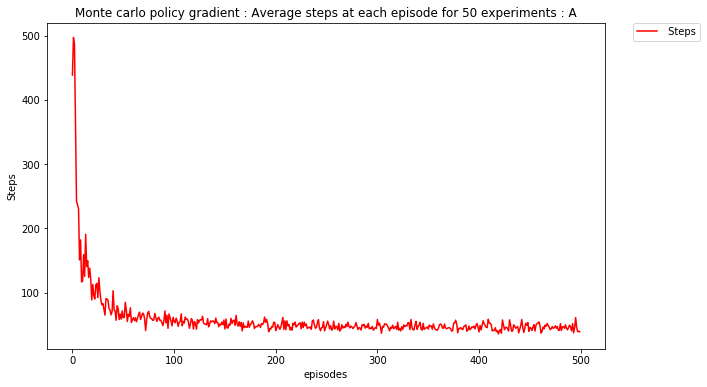

[0, 11]


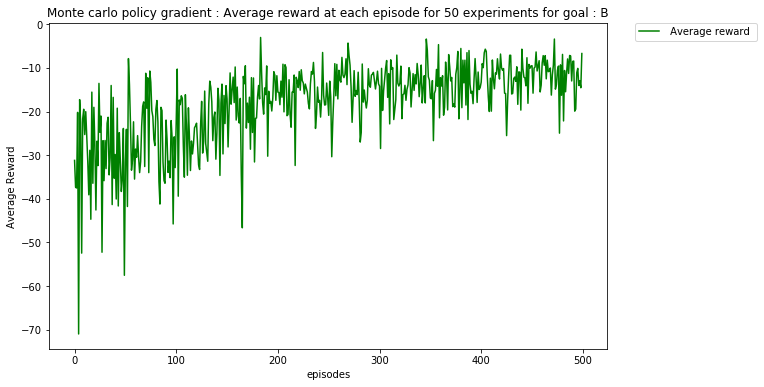

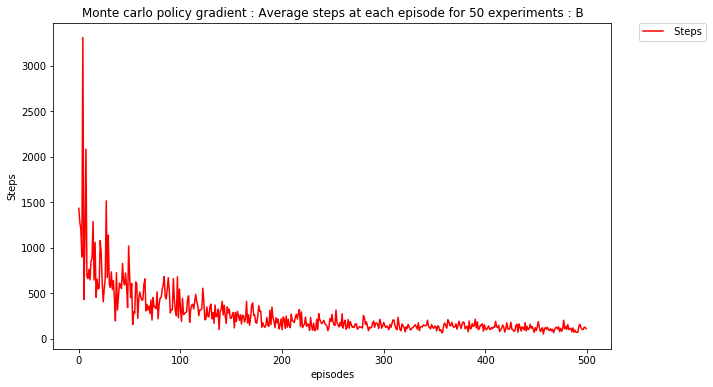

[2, 9]


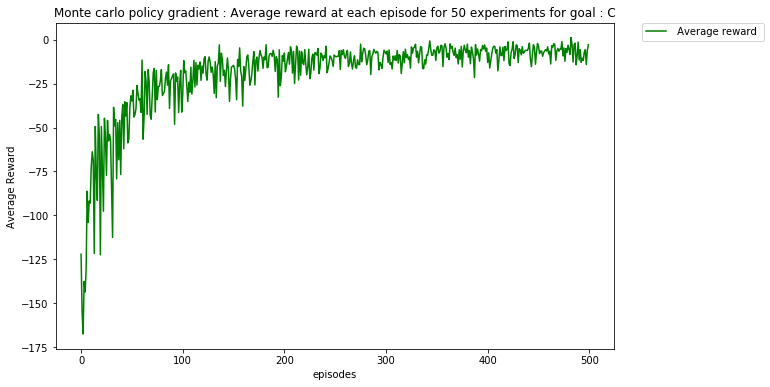

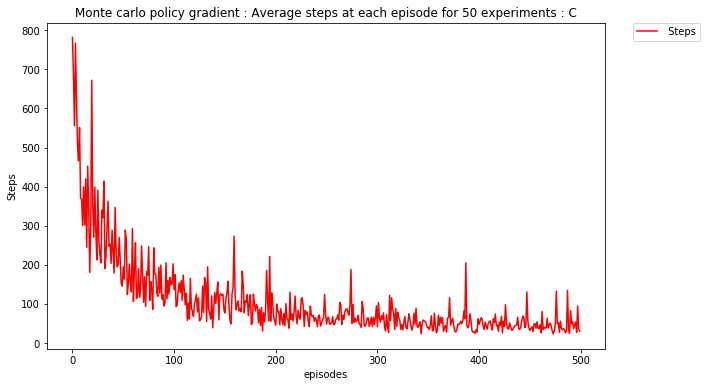

[7, 8]


In [16]:
#########################################
############### Problem 2 ############### 
#########################################


import gym
import numpy as np
from matplotlib import pyplot as plt

import multiprocessing as mp

# The puddle world Environment 
import gym_pdw


class MC_PG:
    
    def selected_param_pos(self, state, action):
        '''
        Returns the row, column, the direction assigned to the parameter
        '''
        direction = action
        row,col = state
        return row, col, direction
    

    def softmax_action(self, state, parameters):
        '''
        Returns action and the probability of that action
        '''
        x, y = state
        north = parameters[x,0,0] + parameters[y,1,0]
        east = parameters[x,0,1] + parameters[y,1,1]
        west = parameters[x,0,2] + parameters[y,1,2]
        south = parameters[x,0,3] + parameters[y,1,3]
        
        # The preferences of each action
        preferences = [north, east, west, south]    
        prefs = np.exp(preferences)
        # The probability of selecting each action
        softmax = (prefs)/np.sum(prefs)
        
        action = np.random.choice([0,1,2,3], 1, p=softmax)
        # print(action)
        action = action[0]
        
        return action, softmax[action]


    def update(self, parameters, states, actions, rewards, params_pos, probs, gamma, alpha):
        '''
        Updates the the parameters
        '''
        
        # Initialize return
        G = 0
        
        i=0
        for prob, pos, reward in zip(probs[::-1], params_pos[::-1], rewards[::-1]):
            
            # The positions of parameters that was used to select the action in ith time step
            row, col, direction = pos
            
            # The parameters that were used in action selection
            theta1 = parameters[row, 0, direction]
            theta2 = parameters[col, 1, direction]
                    
            # The return 
            G = reward + pow(gamma,i)*G
            
            # The update equations
            theta1 = theta1 + alpha*pow(gamma,i)*(1 - prob)
            theta2 = theta2 + alpha*pow(gamma,i)*(1 - prob)
            
            parameters[row, 0, direction] = theta1
            parameters[col, 1, direction] = theta2
            
            i+=1
            
            return parameters

    
    
    def mc_pg(self, gamma, alpha, episodes, env, goal):
        '''
        Performs monte carlo policy gradient
        '''

        # For each row,direction and For each column,direction one parameter
        parameters = np.random.rand(12,2,4)

        # Set goal postion
        goal_pos = env.set_goal(goal)

        # The num steps and avg_reward that we get from each episode is stored
        steps = np.zeros([episodes])
        avg_reward = np.zeros([episodes])

        for episode in range(episodes):
            # An episode

            # Store all the states, actions, rewards till the end of episode 
            states = []
            actions = []
            rewards = []

            # The parameters that are at each time step
            params_pos = []
            # The probability of picking those parameters
            probs = []

            # Reset environment
            curr_state = env.reset()


            while True:
                # For each step of an episode

                # select an action according to softmax probabilities
                curr_action, prob = self.softmax_action(curr_state, parameters)

                # Get reward and next state
                next_state, reward = env.step(curr_state, curr_action)

                probs.append(prob)
                params_pos.append(self.selected_param_pos(curr_state, curr_action))

                states.append(curr_state)
                actions.append(curr_action)
                rewards.append(reward)

                # Increase the number of steps
                steps[episode] +=1

                # reward till now in the episode used for getting average for all the experiments
                avg_reward[episode] += reward

                curr_state = next_state

                if curr_state == goal_pos:

                    # print("Steps =======================", steps[episode])
                    # print("reward=======================", avg_reward[episode])
                    break

            # Update the parameters used in action selection in the episode
            parameters = self.update(parameters, states, actions, rewards, params_pos, probs, gamma, alpha)


        return avg_reward, steps, parameters

        
    def plot_mc_pg(self, avg_reward, steps, episodes, goal):
        '''
        Gets the data for all curves and plots them in one graph
        '''
        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)
        
        # colors for different values of epsilon
        colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

        fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
        fig2.plot(range(episodes), steps, colors[1], label = " Steps")
        
        # Labelling the plot
        fig1.title.set_text('Monte carlo policy gradient : Average reward at each episode for 50 experiments for goal : '+ goal)
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Labelling the plot
        fig2.title.set_text('Monte carlo policy gradient : Average steps at each episode for 50 experiments : '+ goal)
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
        # Display the plot
        plt.show()


    # To display the obtained policy
    def plot_policy(self, goal_pos, policy):
        plt.rcParams['figure.figsize'] = [7,7]
        fig, ax = plt.subplots()
        # Plot the values of a 2D matrix or array as color-coded image.
        ax.matshow(policy)
        for i in range(12):
            for j in range(12):
                if [j,i] == goal_pos:
                    # Show G at the goal of grid  
                    ax.text(i,j,'G', va='center', ha='center')
                else:
                    # Show the direction at each grid cell according to policy
                    c = int(policy[j,i])
                    direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                    ax.text(i, j, direcs[c], va='center', ha='center')



if __name__ == '__main__':
    '''
    Defining the parameters
    '''
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 500
    
    # Instance of class SARSA
    mc = MC_PG()

    # The goal positions in the environment
    goal_positions = {'A':[0,11],'B':[2,9],'C':[7,8]}
    # A dict to reference goal in a loop
    temp = {0:'A',1:'B',2:'C'}


    for x in range(len(goal_positions)):
        goal = temp[x]

        # Number of process to run in parallel here 4  
        pool = mp.Pool(processes = 4)
        # Gets all the outputs into 'data' after all processes are finished, we are running total of 50 experiments
        data = [pool.apply(mc.mc_pg,args=(gamma, alpha, episodes, gym.make('gym_pdw:pdw-v0'),goal)) for i in range()] 

        # Store the average reward at each episode
        avg = np.zeros([episodes])
        # Store the number of steps in each episode
        stp = np.zeros([episodes])


        # To get the average rewards at each episode and average number of steps in each episode
        for i in range(episodes):
            for j in range(len(data)):
                avg[i] += data[j][0][i]/len(data)
                stp[i] += data[j][1][i]/len(data)

#         # To store final policy obtained for 50 experiments 
#         policy = np.zeros([12,12])

#         # Used to select most chosen action over all experiments 
#         val = {0:0, 1:0, 2:0, 3:0}

#         # Selects the most times chosen action over all experiments according to policy in each state
#         for i in range(12):
#             for j in range(12):
#                 for k in range(len(data)):
#                     val[np.argmax(data[k][2], axis=0)[i,j]]+=1
#                 # Get the most chosen action at the current state
#                 max_ = max(val, key=val.get)
#                 val = {0:0, 1:0, 2:0, 3:0}
#                 policy[i,j] = max_



        # Plot for 
        mc.plot_mc_pg(avg, stp, episodes, goal)
        print(goal_positions[goal])
        # sr.plot_policy(goal_positions[goal], policy)
    